# Manuscript Image Similarity

This notebook implements image similarity calculation with downloaded manuscript images.

## Representation Calculations

Load Model and define function

In [2]:
import torch
import timm

image_model = timm.create_model('resnet50', pretrained=True, num_classes=0)
image_model.eval() # this turns off dropout etc, important!


<bound method Module.__repr__ of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace

In [5]:
print(isinstance(image_model, torch.nn.Module))

True


Load manuscript images

In [2]:
import numpy as np
from torchvision import datasets, transforms

image_size = 500

transform = transforms.Compose([transforms.Resize(image_size),
                                transforms.CenterCrop(image_size-1),
                                transforms.ToTensor()])
manuscript_dataset = datasets.ImageFolder('../data/images/', transform=transform)
manuscript_label_to_name =  {value:key for key, value in manuscript_dataset.class_to_idx.items()}

manuscript_dataloader = torch.utils.data.DataLoader(manuscript_dataset, batch_size=1, shuffle=False)

image_batch, label_batch = next(iter(manuscript_dataloader))

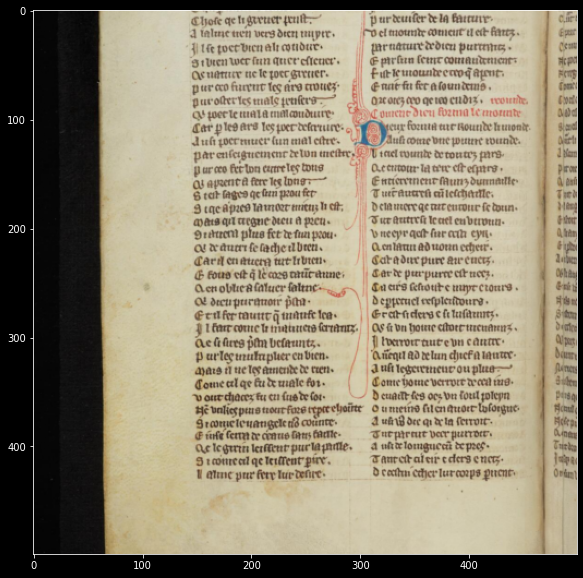

In [3]:
import matplotlib.pyplot as plt

def plot_image(image_tensor, gray=True):
    if isinstance(image_tensor, torch.Tensor):
        image_tmp = image_tensor.clone()
        image_tmp = image_tmp.numpy()
        image_tmp=np.swapaxes(image_tmp,0,1)
        image_tmp=np.swapaxes(image_tmp,1,2)
        
    elif isinstance(image_tensor, np.ndarray):
        image_tmp = image_tensor.copy()
    fig = plt.figure(figsize=(10,10))
    if gray:
        plt.imshow(image_tmp, cmap='gray')
    else:
        plt.imshow(image_tmp)
    plt.show()
plot_image(image_batch[0])


Calculate manuscript vectors

In [4]:
manuscript_vectors = []
manuscript_labels = []
for batch_of_images, batch_of_labels in manuscript_dataloader:
    batch_of_vectors = image_model(batch_of_images)
    manuscript_vectors.append(batch_of_vectors)
    manuscript_labels.append(batch_of_labels)
    
manuscript_vectors = torch.cat(manuscript_vectors)
manuscript_labels = torch.cat(manuscript_labels)

Save the vectors and labels

In [ ]:
np.save('numpy/vectors.npy', manuscript_vectors.detach().numpy())
np.save('numpy/labels.npy', manuscript_labels.detach().numpy())